In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

data = pd.read_csv('pizza_sales.csv')

In [22]:
# pizza_id: A unique identifier assigned to each distinct pizza variant available for ordering.
# order_id: A unique identifier for each order made, which links to multiple pizzas.
# pizza_name_id: An identifier linking to a specific name of the pizza.
# quantity: The number of units of a specific pizza variant ordered within an order.
# order_date: The date when the order was placed.
# order_time: The time when the order was placed.
# unit_price: The cost of a single unit of the specific pizza variant.
# total_price: The aggregated cost of all units of a specific pizza variant in an order.
# pizza_size: Represents the size of the pizza (e.g., small, medium, large).
# pizza_category: Indicates the category of the pizza, such as vegetarian, non-vegetarian, etc.
# pizza_ingredients: Provides a list or description of the ingredients used in the pizza.
# pizza_name: Specifies the name of the specific pizza variant ordered.

In [23]:
data.head()
data.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [24]:
data.tail()
data['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [25]:
df = pd.DataFrame(data)

pizza_size={'S':1,'M':2,'L':3,'XL':4,'XXL':5}
df['pizza_size']=df['pizza_size'].map(pizza_size)

df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,2,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,2,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,3,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,3,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,2,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [26]:
df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [27]:
pizza_category={'Classic':1,'Veggie':2,'Supreme':3,'Chicken':4}
df['pizza_category']=df['pizza_category'].map(pizza_category)
df.head(3)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,2,1,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,2,1,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,3,2,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


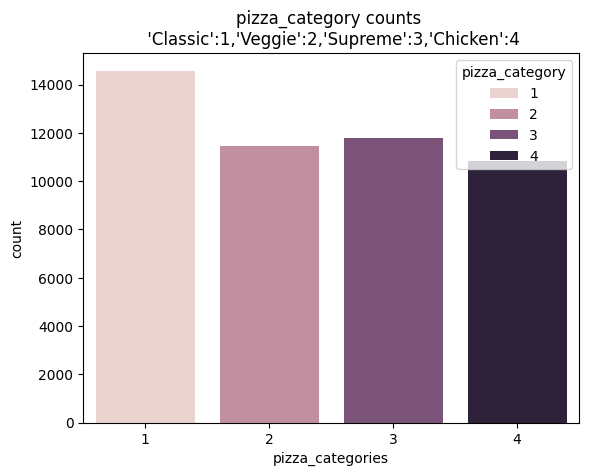

In [28]:
graph = sns.countplot(x='pizza_category',data=df,hue='pizza_category')
plt.title("pizza_category counts \n 'Classic':1,'Veggie':2,'Supreme':3,'Chicken':4")
plt.xlabel("pizza_categories")
plt.ylabel("count")

plt.show()

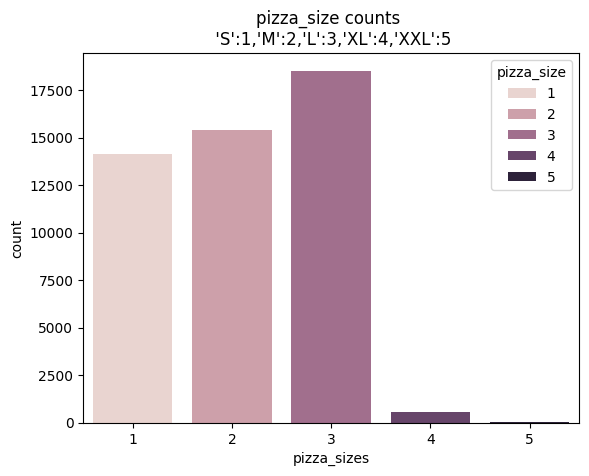

In [29]:
graph = sns.countplot(x='pizza_size',data=df,hue='pizza_size')
plt.title("pizza_size counts \n 'S':1,'M':2,'L':3,'XL':4,'XXL':5")
plt.xlabel("pizza_sizes")
plt.ylabel("count")

plt.show()

Text(0, 0.5, 'unit_price')

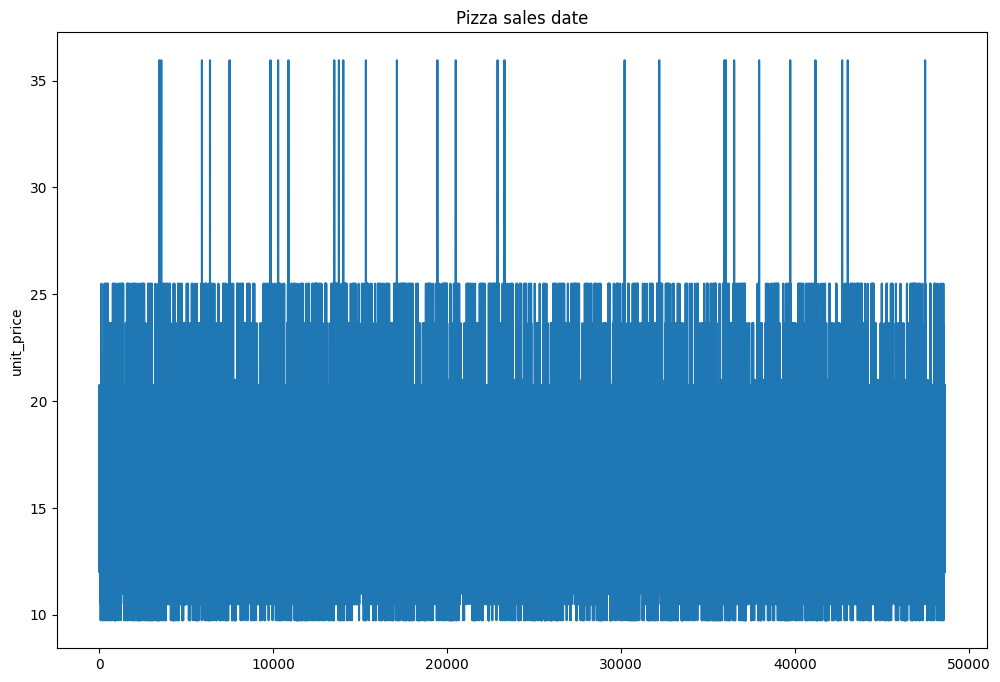

In [30]:
import matplotlib.pyplot as plt

data['unit_price'].plot(figsize=(12,8),title='Pizza sales date')
plt.ylabel('unit_price')

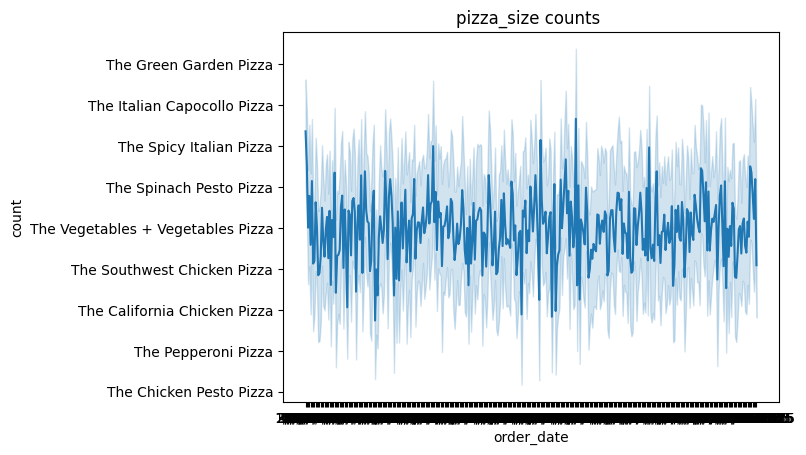

In [31]:
graph = sns.lineplot(x='order_date',data=df,y='pizza_name')
plt.title("pizza_size counts ")
plt.xlabel("order_date")
plt.ylabel("count")

plt.show()

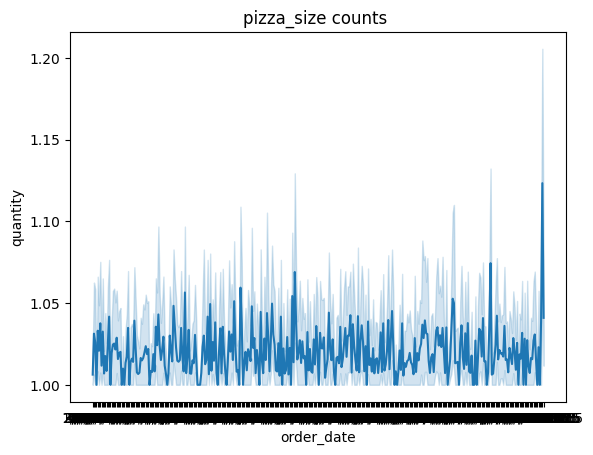

In [32]:
graph = sns.lineplot(x='order_date',data=df,y='quantity')
plt.title("pizza_size counts ")
plt.xlabel("order_date")
plt.ylabel("quantity")

plt.show()

In [33]:
df_grouped = df.groupby('order_date').agg(
    total_quantity=('quantity', 'sum'),
    total_revenue=('total_price', 'sum')
).reset_index()

print(df_grouped)


    order_date  total_quantity  total_revenue
0     1/1/2015           162.0        2713.85
1    1/10/2015           194.0        3202.15
2    1/11/2015           124.0        1986.65
3    1/12/2015           131.0        2076.70
4     1/2/2015           191.0        3189.20
..         ...             ...            ...
353   9/5/2015           144.0        2368.40
354   9/6/2015           147.0        2442.55
355   9/7/2015           135.0        2297.75
356   9/8/2015           126.0        2002.65
357   9/9/2015           157.0        2580.10

[358 rows x 3 columns]


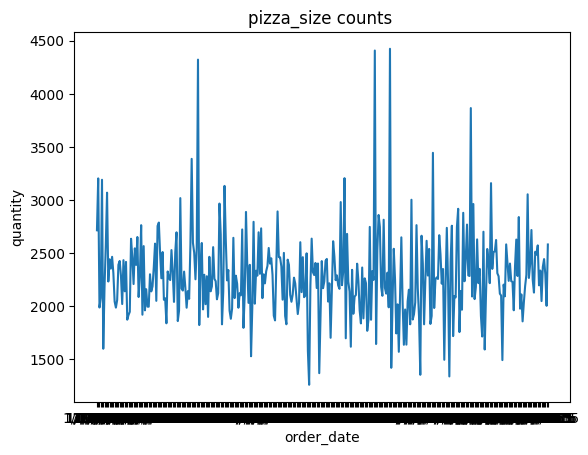

In [34]:
graph = sns.lineplot(x=df_grouped['order_date'],data=df,y=df_grouped['total_revenue'])
plt.title("pizza_size counts ")
plt.xlabel("order_date")
plt.ylabel("quantity")

plt.show()

       pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
1650     1651.0     737.0      bbq_ckn_m       1.0        NaT   11:31:34   
1651     1652.0     737.0     thai_ckn_m       1.0        NaT   11:31:34   
1652     1653.0     738.0   southw_ckn_m       1.0        NaT   12:16:47   
1653     1654.0     739.0     big_meat_s       1.0        NaT   12:19:38   
1654     1655.0     740.0     cali_ckn_m       1.0        NaT   12:29:51   
...         ...       ...            ...       ...        ...        ...   
48615   48616.0   21348.0  ckn_alfredo_m       1.0        NaT   21:23:10   
48616   48617.0   21348.0  four_cheese_l       1.0        NaT   21:23:10   
48617   48618.0   21348.0   napolitana_s       1.0        NaT   21:23:10   
48618   48619.0   21349.0     mexicana_l       1.0        NaT   22:09:54   
48619   48620.0   21350.0      bbq_ckn_s       1.0        NaT   23:02:05   

       unit_price  total_price  pizza_size  pizza_category  \
1650        16.75        

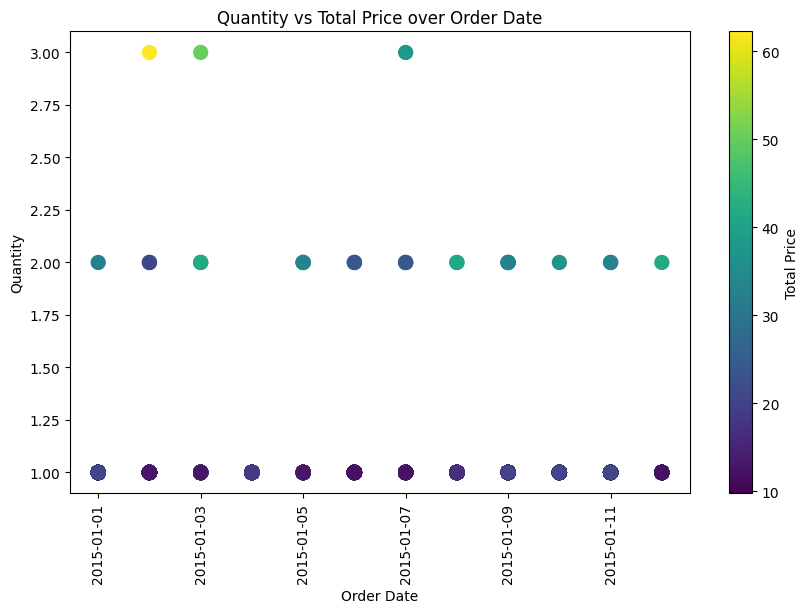

In [35]:
import matplotlib.pyplot as plt

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

print(df[df['order_date'].isna()])

filtered_df = df[df['order_date'] < '2015-02-01']

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['order_date'], filtered_df['quantity'], c=filtered_df['total_price'], cmap='viridis',s=100)
plt.title('Quantity vs Total Price over Order Date')
plt.xlabel('Order Date')
plt.ylabel('Quantity')
plt.colorbar(label='Total Price')
plt.xticks(rotation=90)
plt.show()


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  float64       
 1   order_id           48620 non-null  float64       
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  float64       
 4   order_date         19587 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  int64         
 9   pizza_category     48620 non-null  int64         
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 4.5+ MB


Highest sale:  4.0 quantity
Lowest sale was of:  1.0 quantity
Average sale:  1.0196215549156726 quantity


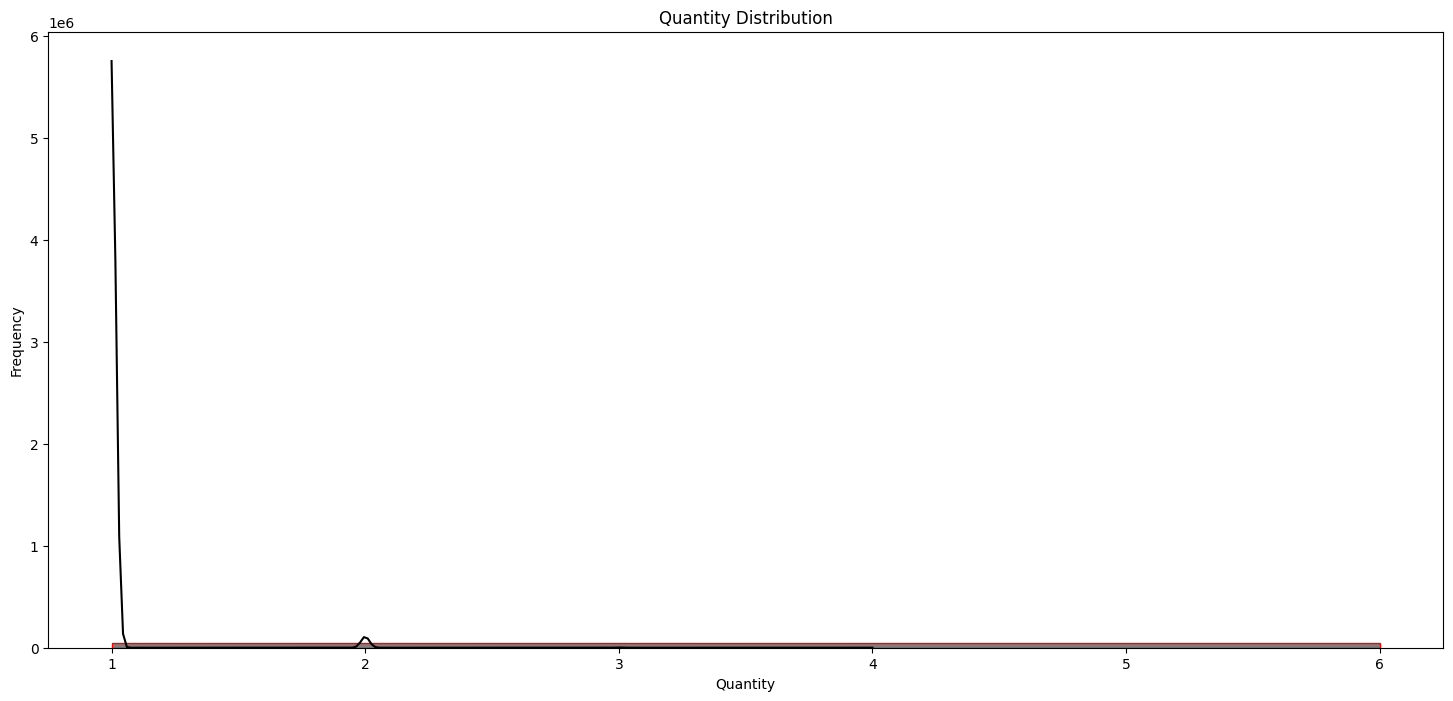

In [39]:
if df['quantity'].isnull().any():
    print("Warning: Missing values detected in 'quantity'. Dropping rows with NaN values.")
    df = df.dropna(subset=['quantity'])

# Check if 'quantity' has any data
if df['quantity'].empty:
    print("Error: 'quantity' column is empty.")
else:
    # Print sales statistics
    print('Highest sale: ', df['quantity'].max(), 'quantity')
    print('Lowest sale was of: ', df['quantity'].min(), 'quantity')
    print('Average sale: ', df['quantity'].mean(), 'quantity')

    # Plotting histogram for 'quantity'
    plt.figure(figsize=(18, 8))
    
    # Create histogram with appropriate bin ranges
    sns.histplot(df['quantity'], bins=np.arange(df['quantity'].min(), df['quantity'].max() + 5, 5),color='black', edgecolor='red', kde=True)

    # Set plot titles and labels
    plt.title('Quantity Distribution')
    plt.xlabel('Quantity')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


In [41]:
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,2,1,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,2,1,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


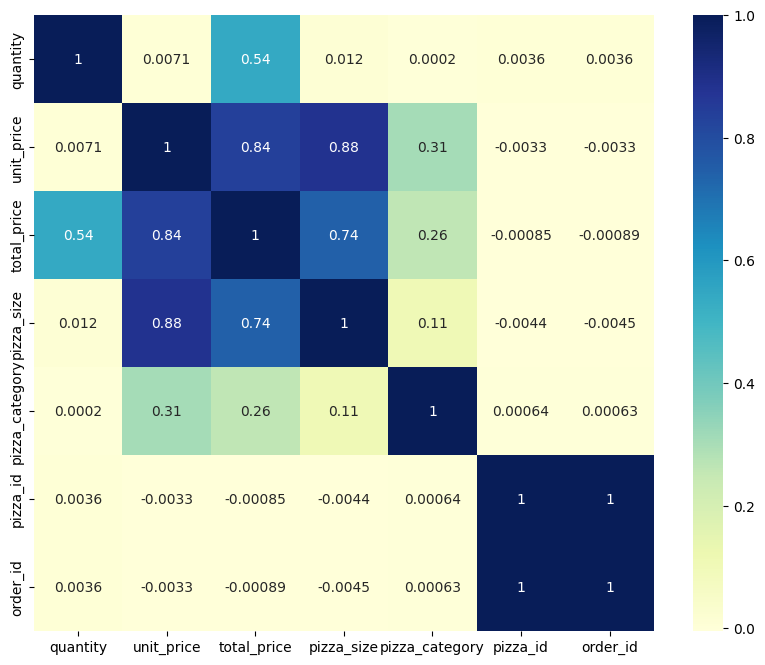

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df[["quantity", "unit_price", "total_price", "pizza_size", "pizza_category", "pizza_id", "order_id"]]
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', cbar=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.xticks(rotation=0)

plt.show()
